<a href="https://colab.research.google.com/github/Isaias-Barbosa/Pyspark/blob/main/Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INSTALANDO AS DEPENDÊNCIAS DO PYSPARK

!apt-get install openjdk-8-jdk-headless -qq > /dev/null #INSTALANDO O JAVA 8
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz #INSTALANDO O APACHE SPARK
!tar xf spark-2.4.4-bin-hadoop2.7.tgz # Descompactando os arquivos
!pip install -q findspark #INSALANDO O PYSPARK


In [ ]:
#IMPORTANDO O MATPLOTLIB PARA USO DE GRÁFICOS
import numpy as np # Importando o Numpy
import matplotlib.pyplot as plt #importando o matplotlib
import seaborn as sns #IMPORTANDO O SEABORN
import pandas as pd #IMPORTANDO O PANDAS


In [ ]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [ ]:
#importando o pyspark
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [ ]:
# instalando a findspark
!pip install -q findspark

In [ ]:
# importando o pacote necessário para iniciar uma seção Spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# iniciando o spark context
park = SparkSession.builder.master('local[*]').getOrCreate()
spark = SparkSession.builder.appName("Introducao").getOrCreate()


park.createDataFrame
# Verificando se a sessão foi criada
park


In [ ]:
# Fazendo download do arquivo csv
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/aluguel/aluguel.csv

In [ ]:
# carregando um conjunto de dados que baixamos do git
aluguel = park.read.csv(
    path = "/content/aluguel.csv", 
    inferSchema = True, 
    sep = ';', 
    header = True,
    encoding = "UTF-8")

In [ ]:
# Verificando o tipo de objeto criado
type(aluguel)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Execudando o dataset no PYSPARK
aluguel.show()

+--------------+----+-------+---------+-------------+-----+-------------+----------+----------------+-------------+----------+------------+-----------+
|        cidade|area|quartos|banheiros|vagas_garagem|andar|aceita_animal|mobiliaria|valor_condominio|valor_aluguel|valor_iptu|valor_seguro|valor_total|
+--------------+----+-------+---------+-------------+-----+-------------+----------+----------------+-------------+----------+------------+-----------+
|     São Paulo|  70|      2|        1|            1|    7|            1|         1|            2065|         3300|       211|          42|       5618|
|     São Paulo| 320|      4|        4|            0|   20|            1|         0|            1200|         4960|      1750|          63|       7973|
|  Porto Alegre|  80|      1|        1|            1|    6|            1|         0|            1000|         2800|         0|          41|       3841|
|  Porto Alegre|  51|      2|        1|            0|    2|            1|         0|    

In [ ]:
# verifica o schema da tabela
aluguel.printSchema()

root
 |-- cidade: string (nullable = true)
 |-- area: integer (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- vagas_garagem: integer (nullable = true)
 |-- andar: integer (nullable = true)
 |-- aceita_animal: integer (nullable = true)
 |-- mobiliaria: integer (nullable = true)
 |-- valor_condominio: integer (nullable = true)
 |-- valor_aluguel: integer (nullable = true)
 |-- valor_iptu: integer (nullable = true)
 |-- valor_seguro: integer (nullable = true)
 |-- valor_total: integer (nullable = true)



In [ ]:
#SELECIONANDO 3 OBJETOS PARA VISUALIZAÇÃO 
aluguel.select("cidade", "quartos", "valor_seguro").show(10)

+--------------+-------+------------+
|        cidade|quartos|valor_seguro|
+--------------+-------+------------+
|     São Paulo|      2|          42|
|     São Paulo|      4|          63|
|  Porto Alegre|      1|          41|
|  Porto Alegre|      2|          17|
|     São Paulo|      1|          11|
|     São Paulo|      3|         121|
|Rio de Janeiro|      2|          25|
|     São Paulo|      4|          41|
|     São Paulo|      2|         191|
|Rio de Janeiro|      1|          30|
+--------------+-------+------------+
only showing top 10 rows



In [ ]:
# Verificando o total do Valor do Aluguel por Cidade arrecadado.
aluguel.groupBy('cidade').sum('valor_aluguel').orderBy('cidade').show()

+--------------+------------------+
|        cidade|sum(valor_aluguel)|
+--------------+------------------+
|Belo Horizonte|           4603893|
|      Campinas|           2016740|
|  Porto Alegre|           2788876|
|Rio de Janeiro|           4848089|
|     São Paulo|          27311497|
+--------------+------------------+



In [ ]:
#FILTRANDO DADOS 
aluguel_filtered = aluguel.filter("valor_condominio > 2000 AND valor_iptu > 500 AND cidade IS NOT NULL")
aluguel_filtered.select("cidade", "valor_condominio", "valor_iptu").show(20, False)

+--------------+----------------+----------+
|cidade        |valor_condominio|valor_iptu|
+--------------+----------------+----------+
|São Paulo     |2254            |1735      |
|Rio de Janeiro|2450            |593       |
|São Paulo     |3700            |1584      |
|São Paulo     |4000            |2000      |
|São Paulo     |4052            |1261      |
|São Paulo     |2050            |998       |
|São Paulo     |7400            |3368      |
|São Paulo     |3366            |1800      |
|Rio de Janeiro|2661            |682       |
|São Paulo     |2300            |584       |
|São Paulo     |2100            |634       |
|São Paulo     |2200            |1500      |
|São Paulo     |2021            |996       |
|São Paulo     |2300            |502       |
|São Paulo     |4800            |1750      |
|São Paulo     |3000            |830       |
|São Paulo     |2500            |834       |
|São Paulo     |3500            |1250      |
|São Paulo     |2270            |1110      |
|São Paulo

In [ ]:
#IMPORTANDO A FUNÇÃO MAX DO PYSPARK SQL
from pyspark.sql.functions import max

In [ ]:
# Pegando o valor do aluguel mais caro
maxValue = aluguel_filtered.agg(max("valor_aluguel")).collect()[0][0]
aluguel.select("cidade","valor_aluguel").filter(aluguel.valor_aluguel == maxValue).show(20, False)

+---------+-------------+
|cidade   |valor_aluguel|
+---------+-------------+
|São Paulo|20000        |
|São Paulo|20000        |
|São Paulo|20000        |
|São Paulo|20000        |
+---------+-------------+



In [ ]:
# Pegando o valor do iptu mais caro
maxValue = aluguel_filtered.agg(max("valor_iptu")).collect()[0][0]
aluguel.select("cidade","valor_iptu").filter(aluguel.valor_iptu == maxValue).show(20, False)

+--------------+----------+
|cidade        |valor_iptu|
+--------------+----------+
|Belo Horizonte|12500     |
+--------------+----------+



In [ ]:
#registrando o dataframe como view global
aluguel.createGlobalTempView("aluguel15")

#a visao temporária global está vinculada a um banco de dados pelo sistema 'global_temp'
spark.sql("SELECT * FROM global_temp.aluguel LIMIT 10").show()

+--------------+----+-------+---------+-------------+-----+-------------+----------+----------------+-------------+----------+------------+-----------+
|        cidade|area|quartos|banheiros|vagas_garagem|andar|aceita_animal|mobiliaria|valor_condominio|valor_aluguel|valor_iptu|valor_seguro|valor_total|
+--------------+----+-------+---------+-------------+-----+-------------+----------+----------------+-------------+----------+------------+-----------+
|     São Paulo|  70|      2|        1|            1|    7|            1|         1|            2065|         3300|       211|          42|       5618|
|     São Paulo| 320|      4|        4|            0|   20|            1|         0|            1200|         4960|      1750|          63|       7973|
|  Porto Alegre|  80|      1|        1|            1|    6|            1|         0|            1000|         2800|         0|          41|       3841|
|  Porto Alegre|  51|      2|        1|            0|    2|            1|         0|    

In [ ]:
#PASSANDO O PYSPARK DATAFRAME PARA O PANDAS DATAFRAME
df = aluguel.toPandas()
df.head(10)

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,0.2,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,0.2,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,0.2,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,0.2,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0.0,0,0,800,25,11,836
5,São Paulo,376,3,3,7,0,0.2,0,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,0.2,0,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,0.2,0,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,0.2,1,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,0.2,1,590,2300,35,30,2955


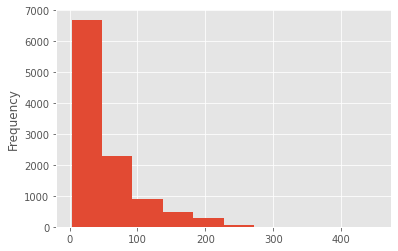

In [ ]:
#OLHANDO O VALORES DO SEGURO
df["valor_seguro"].plot.hist()

Text(0, 0.5, 'Cidades')

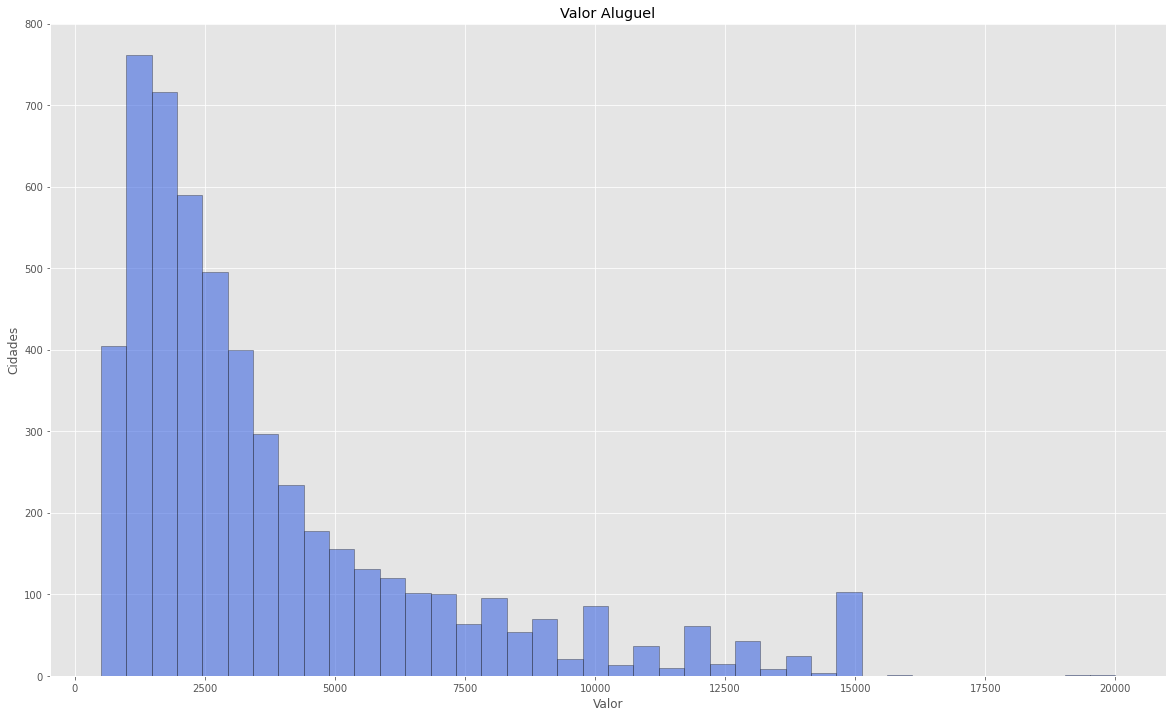

In [ ]:
#VENDO O MAIOR VALOR DE ALUGUEL
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["valor_aluguel"].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Valor Aluguel")
plt.xlabel("Valor")
plt.ylabel("Cidades")

Text(0.5, 1.0, 'Cidade que tem mais alugueis')

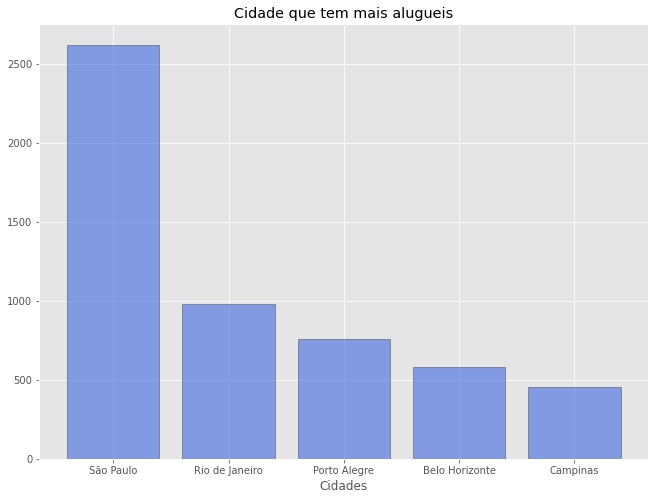

In [ ]:
#OLHANDO AS CIDADES QUE TEM MAIS ALUGUEIS.
count = df["cidade"].value_counts().values
anos = df["cidade"].value_counts().index
plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.bar(anos, count, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("Cidades")
plt.title("Cidade que tem mais alugueis")

Text(0.5, 1.0, 'Quantidade de Andar')

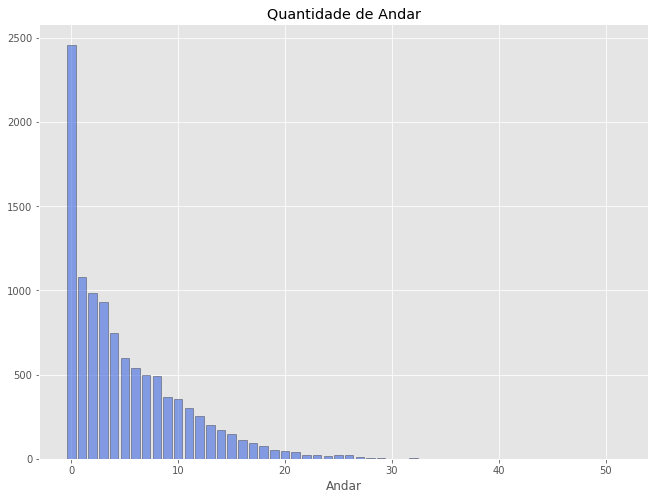

In [ ]:
#olhando a quantidade de andares.
count = df["andar"].value_counts().values
anos = df["andar"].value_counts().index
plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.bar(anos, count, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("Andar")
plt.title("Quantidade de Andar")